In [ ]:
## Dataset
# https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set?select=data

#reference:
## https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4

In [17]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl


In [14]:
# ubah akses menjadi privat
! chmod 600 /content/kaggle.json

In [23]:
#import dataset ke dalam file content
! KAGGLE_CONFIG_DIR=/content/ kaggle  datasets download -d brsdincer/vehicle-detection-image-set

100% 119M/119M [00:06<00:00, 21.5MB/s]
100% 119M/119M [00:06<00:00, 18.5MB/s]


In [26]:
import zipfile
zip_file = zipfile.ZipFile('/content/vehicle-detection-image-set.zip', 'r')
zip_file.extractall('/tmp')

In [27]:
#root directory
base_dir = '/tmp/data'

In [33]:
#import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# harus ada yang diganti
train_datagenerator = ImageDataGenerator(
    brightness_range=[0.3, 0.9],
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    rescale=1./255,
    validation_split=0.5, #50/50
)

test_datagenerator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5
)

In [50]:
#Bagi data menjadi 2, satu untuk generator dan satu untuk di tes
train_generator = train_datagenerator.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #menggunkan binary karena dibagi ke dalam 2 kategori, satu untuk kendaraan dan satu bukan kendaraan
        subset = 'training'
        )

validation_generator = test_datagenerator.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #menggunkan binary karena dibagi ke dalam 2 kategori, satu untuk kendaraan dan satu bukan kendaraan
        subset = 'validation'
        )

Found 8880 images belonging to 2 classes.
Found 8880 images belonging to 2 classes.


In [51]:
#Buat model menggunakan library tensorflow
# kayaknya disini harus ada yg diubah lagi
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #Convolution Layer
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1), #Dropout layer untuk mencegah overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #Dense Layer w/ relu activation
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') #gunakan sigmoid karena menggunakan binary classification dan maksimum valuenya adalah 1
])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [53]:
model.compile(
    optimizer =  'adam',
    loss = 'binary_crossentropy', #gunakan binary karena untuk mendeteksi apakah gambar tersebut kendaraan atau bukan
    metrics = ['accuracy']
)

In [54]:
history = model.fit(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    verbose = 2,
)

Epoch 1/25
20/20 - 10s - loss: 0.6976 - accuracy: 0.5406 - val_loss: 0.6015 - val_accuracy: 0.5509 - 10s/epoch - 491ms/step
Epoch 2/25
20/20 - 9s - loss: 0.5579 - accuracy: 0.7516 - val_loss: 0.7358 - val_accuracy: 0.6208 - 9s/epoch - 429ms/step
Epoch 3/25
20/20 - 9s - loss: 0.4014 - accuracy: 0.8516 - val_loss: 0.5333 - val_accuracy: 0.7944 - 9s/epoch - 433ms/step
Epoch 4/25
20/20 - 9s - loss: 0.3542 - accuracy: 0.8484 - val_loss: 1.2324 - val_accuracy: 0.7215 - 9s/epoch - 427ms/step
Epoch 5/25
20/20 - 9s - loss: 0.2512 - accuracy: 0.8953 - val_loss: 1.2474 - val_accuracy: 0.6927 - 9s/epoch - 430ms/step
Epoch 6/25
20/20 - 10s - loss: 0.3144 - accuracy: 0.8969 - val_loss: 0.8645 - val_accuracy: 0.7680 - 10s/epoch - 492ms/step
Epoch 7/25
20/20 - 10s - loss: 0.2458 - accuracy: 0.8984 - val_loss: 1.1365 - val_accuracy: 0.7145 - 10s/epoch - 503ms/step
Epoch 8/25
20/20 - 9s - loss: 0.1572 - accuracy: 0.9500 - val_loss: 1.0414 - val_accuracy: 0.7562 - 9s/epoch - 434ms/step
Epoch 9/25
20/20 -

Saving extra39.png to extra39.png
1/1 [==============================] - 0s 19ms/step
extra39.png
bukan kendaraan


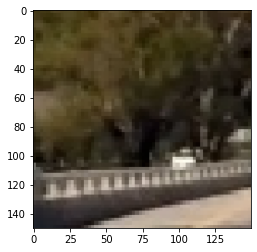

In [58]:
#import library
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
uploaded = files.upload()
     
for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
     
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
     
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
    print('bukan kendaraan')
  else:
    print('kendaraan')

Saving 17.png to 17.png
1/1 [==============================] - 0s 16ms/step
17.png
kendaraan


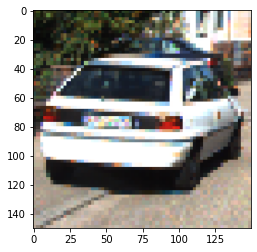

In [60]:
uploaded = files.upload()

for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
     
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
     
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
    print('bukan kendaraan')
  else:
    print('kendaraan')